# Plots

One Variable Plot

* 수치형 → histogram

Two Variables Plot

* 범주형 × 수치형  →  box plot
* 수치형 × 수치형  →  scatter plot

Three Variables Plot

* 수치형 × 수치형 × 범주형  →  scatter plot with color,  treemap
* 수치형 × 수치형 × 수치형  →  bubble chart 
* 범주형 × 범주형 × 수치형  →  heatmap

Special Plot

* Star(spider) chart
* Assoc chart
* Sankey Diagram
* Network

## Python Plot Librarys

Static (한자 한글 표현 문제 ... )

* [matplotlib](https://matplotlib.org/) : low level api
* [seaborn](https://seaborn.pydata.org/) : high level api
* [ggplot](http://ggplot.yhathq.com/)

Interactive

* [Bokeh](https://bokeh.pydata.org)

Refs

* [Choosing a Python Visualization Tool](https://pbpython.com/python-vis-flowchart.html)
* [The Best Python Data Visualization Libraries](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/)

## Libs

In [12]:
import numpy as np
import pandas as pd
from scipy import stats, special
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from time import time
import re

np.set_printoptions( precision=2, edgeitems=6, linewidth=240 )

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from ggplot import *

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import ColumnDataSource, Label, Span

In [14]:
def n_gram( text, n=2 ):
    size = len( text )
    grams = [ text[i:i+n] for i in range(size -n+1 ) ]
    return grams

## Example 1


### Histogram

REF
* [bokeh/gallery/histogram](https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html)

In [15]:
a_data_path = "../data/DYBG_tn.txt"
a_data_stream = open( a_data_path, 'r', encoding="utf-8" )
a_data = a_data_stream.read()
a_data_lines = a_data.split()

a_unigrams = list( "".join(a_data_lines) )
a_unigrams_cnt = Counter( a_unigrams )
a_unigrams_dist = [ freq for gram, freq in a_unigrams_cnt.items() ]

a_bigrams = n_gram( "".join(a_data_lines), n=2 )
a_bigrams_cnt = Counter( a_bigrams )
a_bigrams_dist = [ freq for gram, freq in a_bigrams_cnt.items() ]

In [16]:
b_data_path = "../data/GAZS_tn.txt"
b_data_stream = open( b_data_path, 'r', encoding="utf-8" )
b_data = b_data_stream.read()
b_data_lines = b_data.split()

b_unigrams = list( "".join(b_data_lines) )
b_unigrams_cnt = Counter( b_unigrams )
b_unigrams_dist = [ freq for gram, freq in b_unigrams_cnt.items() ]

b_bigrams = n_gram( "".join(b_data_lines), n=2 )
b_bigrams_cnt = Counter( b_bigrams )
b_bigrams_dist = [ freq for gram, freq in b_bigrams_cnt.items() ]

C:\Users\Junho\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


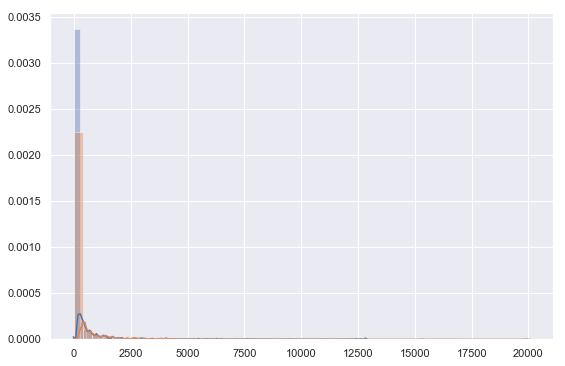

In [17]:
# seaborn

sns.set( color_codes=True)
sns.set(rc={'figure.figsize':(9,6)})
sns.distplot( np.array( a_unigrams_dist ) )
sns.distplot( np.array( b_unigrams_dist ) )

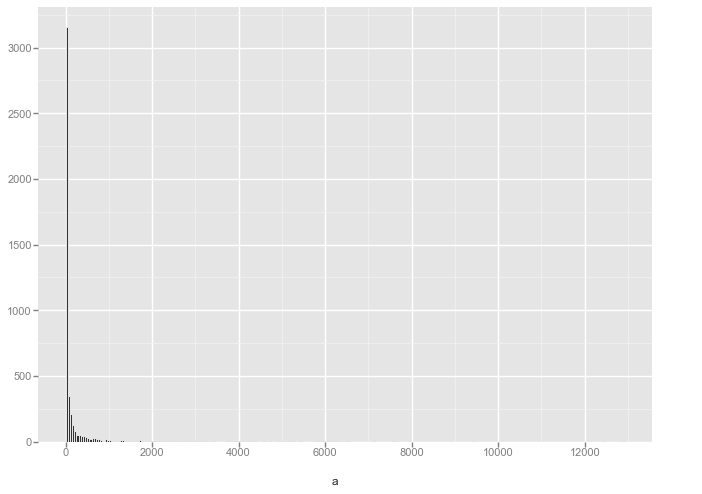

<ggplot: (-9223371897729999577)>

In [18]:
# ggplot

unigram_dist_df = pd.DataFrame(data={'a': a_unigrams_dist })
ggplot(aes(x='a'), data=unigram_dist_df) + geom_histogram(binwidth=50)

In [19]:
# bokeh

def histogram_plot( hist, edges, title="", xlab="", ylab="" ):
    p = figure( title=title, tools='', background_fill_color="#fafafa", plot_width=800, plot_height=400 )
    p.quad( top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5 )
    p.xaxis.axis_label = xlab
    p.yaxis.axis_label = ylab
    p.y_range.start = 0
    p.grid.grid_line_color="white"
    return p

In [20]:
hist, edges = np.histogram( a_unigrams_dist, density=False, bins=100 )
a_p1 = histogram_plot( hist, edges, title="Histogram for Unigram Frequency Distribution of A", xlab="Frequency", ylab="Number of Unigram")

hist, edges = np.histogram( b_unigrams_dist, density=False, bins=100 )
b_p1 = histogram_plot( hist, edges, title="Histogram for Unigram Frequency Distribution of B", xlab="Frequency", ylab="Number of Unigram")


hist, edges = np.histogram( a_unigrams_dist, density=False, bins=200 )
a_p2 = histogram_plot( hist, edges, title="Histogram for Unigram Frequency Distribution of A", xlab="Frequency", ylab="Number of Unigram")

hist, edges = np.histogram( b_unigrams_dist, density=False, bins=200 )
b_p2 = histogram_plot( hist, edges, title="Histogram for Unigram Frequency Distribution of B", xlab="Frequency", ylab="Number of Unigram")

output_notebook()
show( gridplot([a_p1,b_p1], ncols=2, plot_width=400, plot_height=250, toolbar_location=None ) )
show( gridplot([a_p2,b_p2], ncols=2, plot_width=400, plot_height=250, toolbar_location=None ) )


Loading BokehJS ...

### Scatter plot

with Dimentional Reduction

In [21]:
# Build TF-IDF Matrix

t0 = time()
tfidf_1gram_vectorizer = TfidfVectorizer( min_df=200, max_df=0.9, analyzer='char' )
tfidf_1gram = tfidf_1gram_vectorizer.fit_transform( a_data_lines )
tfidf_1gram_features = tfidf_1gram_vectorizer.get_feature_names()
print( "# TF-IDF Matrix done in {:03f}s.".format(time() - t0) )
print( "* unigram Feature Type:", len( tfidf_1gram_features ) )

# TF-IDF Matrix done in 0.436002s.
* unigram Feature Type: 638


In [22]:
# Dimentional Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

term_vectors= tfidf_1gram.T.todense()
t0 = time()
svd_tfidf_1gram_term_model = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd_tfidf_1gram_term = svd_tfidf_1gram_term_model.fit_transform( term_vectors )  
print( "done in {:03f}s.".format(time() - t0) )

done in 0.448973s.


In [23]:
# Build Bokeh Plot

source = ColumnDataSource( data={
    'x'  : svd_tfidf_1gram_term[:,0],
    'y'  : svd_tfidf_1gram_term[:,1],
    'term' : tfidf_1gram_features
})

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
    ("term", "@term"),
]

plot = figure( title="Term Distribution", plot_width=600, plot_height=600, tooltips=TOOLTIPS )
plot.scatter( 'x', 'y', color="gray", alpha=0.5, source=source )
output_notebook()
show( plot )

Loading BokehJS ...

In [24]:
tsne_parms = {
    "n_components": 2,
    "perplexity": 10,
    "learning_rate": 100,
    "n_iter": 1000,
    "verbose": 0,
    "random_state": 1,
    "angle": 0.5   
}

t0 = time()
# SVD
svd_tfidf_1gram_term_model_ = TruncatedSVD(n_components=64, n_iter=7, random_state=42)
svd_tfidf_1gram_term_ = svd_tfidf_1gram_term_model_.fit_transform( term_vectors )  
# TSNE
tsne_tfidf_1gram_term_model = TSNE( **tsne_parms )
tsne_tfidf_1gram_term = tsne_tfidf_1gram_term_model.fit_transform( svd_tfidf_1gram_term_ )
print( "done in {:03f}s.".format(time() - t0) )

done in 3.927969s.


In [25]:
# Build Bokeh Plot

source = ColumnDataSource( data={
    'x'  : tsne_tfidf_1gram_term[:,0],
    'y'  : tsne_tfidf_1gram_term[:,1],
    'term' : tfidf_1gram_features
})

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
    ("term", "@term"),
]

plot = figure( title="Term Distribution", plot_width=600, plot_height=600, tooltips=TOOLTIPS )
plot.scatter( 'x', 'y', color="gray", alpha=0.5, source=source )
output_notebook()
show( plot )

Loading BokehJS ...

### heatmap

* [seaborn/heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

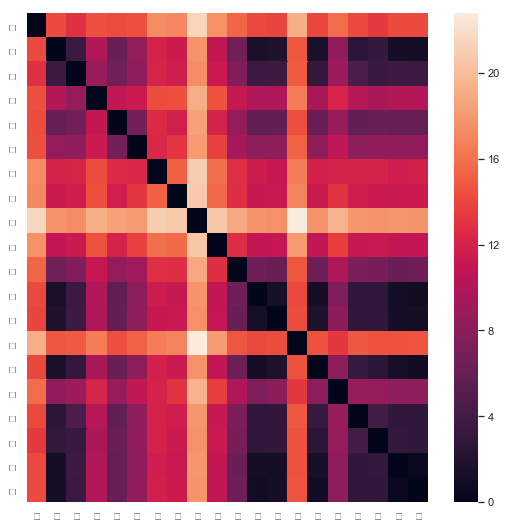

In [26]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import matplotlib as mpl

sns.set(font='HANBatang')
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap( euclidean_distances( svd_tfidf_1gram_term_[:20,:]), xticklabels=tfidf_1gram_features[:20], yticklabels=tfidf_1gram_features[:20] )

## Example 2

In [27]:
import math 

def t_score( o, e ):
    return ( o - e ) / math.sqrt( o + 1 )

def sim_ll( o, e ):
    if e == o : return 0
    rst = 2 * ( o * math.log( o / e ) - ( o - e ) )
    if o >= e : return rst
    else : return -1 * rst

def calc_measure( data_tgt, data_org, by, n, measure_func=t_score, o_min=6 ):
    basement = data_org.get( by )
    if not basement: 
        print( "There is no basement" )
        return 
    org_p = len( basement ) / n
    rst = []
    for tg, ridx in data_tgt.items():
        tgt_p = len( ridx ) / n
        o = len( list( set( basement ) & set( ridx ) )  )
        if o < o_min: continue
        e = n * org_p * tgt_p
        m = measure_func( o, e )
        rst.append( (tg, o, e, m) )
    return rst
    

In [28]:
input_paths = [ "../data/tntk_formulas_herbs", "../data/tntk_formulas_symps" ]
herb_list = open( input_paths[0], 'r', encoding="utf-8").readlines()
symp_list = open( input_paths[1], 'r', encoding="utf-8").readlines()

data_size = len( herb_list )

herb_ridx = {}
symp_ridx = {}

for idx in range( data_size ):
    h_targets = herb_list[ idx ]
    
    for _h in h_targets.split():
        h, _ = _h.split("|")
        if herb_ridx.get( h ): herb_ridx[ h ].append( idx )
        else: herb_ridx[ h ] = [ idx ]

    s_targets = symp_list[ idx ]
    
    for _s in s_targets.split():
        s, _ = _s.split("|")
        if symp_ridx.get( s ): symp_ridx[ s ].append( idx )
        else: symp_ridx[ s ] = [ idx ]


### Scatter Plot & Bubble Chart

In [29]:
term = "상한"
associations = calc_measure( data_tgt=herb_ridx, data_org=symp_ridx, by=term, n=data_size, measure_func=t_score, o_min=6 )
assoc_df = pd.DataFrame( associations, columns = ["herb", "o", "e", "score"] )
assoc_df['o_sqrt'] = np.sqrt( assoc_df['o'] + 1 )

In [30]:
output_notebook() 
source = ColumnDataSource( assoc_df )
TOOLTIPS = [
    ("herb", "@herb"),
    ("(x,y)", "($x, $y)"),
    ("score", "@score")
]
p1 = figure( plot_width=600, plot_height=600, title=term + " Associations ( t-score )", tooltips=TOOLTIPS )
p1.circle(x='o_sqrt', y='score', size=6, color="navy", alpha=0.5, source=source)
p1.xaxis.axis_label = "squared Observed Value"
p1.yaxis.axis_label = "T-Score"

neutral_line = Span( location=0, dimension='width', line_color='green', line_dash='dashed', line_width=1)
p1.add_layout(neutral_line)

show( p1 )

Loading BokehJS ...

In [32]:
p2 = figure( plot_width=600, plot_height=600, title=term + " Associations ( t-score )", tooltips=TOOLTIPS )
p2.circle(x='o_sqrt', y='score', size="e", color="navy", alpha=0.5, source=source)
p2.xaxis.axis_label = "squared Observed Value"
p2.yaxis.axis_label = "T-Score"
neutral_line = Span( location=0, dimension='width', line_color='green', line_dash='dashed', line_width=1)
p2.add_layout(neutral_line)
show( p2 )

In [33]:
associations1 = calc_measure( data_tgt=herb_ridx, data_org=symp_ridx, by="상한", n=data_size, measure_func=t_score, o_min=6 )
associations2 = calc_measure( data_tgt=herb_ridx, data_org=symp_ridx, by="중풍", n=data_size, measure_func=t_score, o_min=6 )

assoc1_df = pd.DataFrame( associations1, columns = ["herb", "o", "e", "score"] )
assoc2_df = pd.DataFrame( associations2, columns = ["herb", "o", "e", "score"] )

df_m = pd.merge( assoc1_df, assoc2_df, on=['herb', 'herb'])
df_m['bias'] = np.abs( df_m['score_x'] - df_m['score_y'] )

In [34]:
output_notebook() 
source = ColumnDataSource( df_m )
TOOLTIPS = [
    ("herb", "@herb"),
    ("(x,y)", "($x, $y)"),
]
p = figure( plot_width=600, plot_height=600, title="상한&중풍 " + " Associations ( t-score )", tooltips=TOOLTIPS )
p.circle('score_x', 'score_y', size='bias', color="navy", alpha=0.5, source=source)
p.xaxis.axis_label = "상한"
p.yaxis.axis_label = "중풍"
show( p )

Loading BokehJS ...

## Example 3

## Appendix

### Fonts

In [ ]:
from matplotlib import font_manager

font_paths = font_manager.findSystemFonts()
font_objects = font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print( font_names )

font_name = "STKaiti"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

# https://jdhao.github.io/2017/05/13/guide-on-how-to-use-chinese-with-matplotlib/

font_location = 'c:/Windows/Fonts/HANBatang.ttf'  
# ex - 'C:/asiahead4.ttf'
font_name = mpl.font_manager.FontProperties(fname = font_location).get_name()
mpl.rc('font', family = font_name)

# https://gomguard.tistory.com/172

flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print( names )

## REFs

* [Python Graph Gallery](https://python-graph-gallery.com/)
* [Visualizing Data with Bokeh and Pandas](https://programminghistorian.org/en/lessons/visualizing-with-bokeh)